<a href="https://colab.research.google.com/github/eliezerkapish/Airbnb-Orlando-Data-Analysis/blob/main/Airbnb_Orlando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**About**

A invester is interested in purchasing 10 holiday homes for investment. Based on the performance of analysis, is this a good investment?

#**Questions for The Analysis**

What is the best type of the house to invest?
What is the ROI (paying 20% of an agent comission comparing without an agent)?
What would happen if the rent drops 20% in the average?

#**Loading Packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Importing Datasets**

In [ ]:
airbnb_listings = pd.read_excel('/content/drive/MyDrive/Airbnb/Airbnb_listings.xlsx')
buy_vacation_home = pd.read_excel('/content/drive/MyDrive/Airbnb/Buy_Vacation_Home.xlsx')
investment_option = pd.read_excel('/content/drive/MyDrive/Airbnb/Investment_Option.xlsx')
month_bedrooms = pd.read_excel('/content/drive/MyDrive/Airbnb/Month_Bedrooms.xlsx')
myrental_agency = pd.read_excel('/content/drive/MyDrive/Airbnb/MyRental.xlsx')
occupancy_calendar = pd.read_excel('/content/drive/MyDrive/Airbnb/Ocupacao_Calendario.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


#**Head of Datasets**

## Airbnb_listing

In [ ]:
airbnb_listings.head()

,id,url,property_name,avg_price_per_night,guests,bedrooms,beds,baths,reviews,Rating,host,location,type,languages,host_since,Weekly_Views,host maturity
0,6629005,https://www.airbnb.com/rooms/6629005,"Fantasy World 2br, Universal Studio",110.0,6,2,3.0,2.0,201.0,5.0,Luis & Tati,Kissimmee,Entire apartment,"English, Español, Português",2013-09-01,1000,10
1,22679214,https://www.airbnb.com/rooms/22679214,Incredible FantasyWorld NewlyRenovated Near Di...,100.0,8,2,4.0,2.0,61.0,5.0,Cai Ling & John,Kissimmee,Entire apartment,"English, Español",2015-01-01,1000,9
2,2431772,https://www.airbnb.com/rooms/2431772,DISNEY VACATION APARTMENT~EXCELLENT,65.0,6,2,5.0,2.0,172.0,4.5,Eudo,Kissimmee,Entire apartment,"English, Español",2013-11-01,1000,10
3,5048917,https://www.airbnb.com/rooms/5048917,"Fantasy World 2br, Wet N Wild! Close to Disney!",97.0,6,2,5.0,2.0,204.0,4.5,Luis & Tati,Kissimmee,Entire apartment,"English, Español, Português",2013-09-01,1000,10
4,10624178,https://www.airbnb.com/rooms/10624178,Welcome to your house in Orlando and Disney area!,123.0,12,4,9.0,3.0,149.0,5.0,Samuel,Kissimmee,Entire house,"English, Español, Français, Português",2015-06-01,1000,9


## Buy_Vacation_Home

In [ ]:
buy_vacation_home.head()

,House,region,type,condition,Bedrooms,Bathrooms,area_in_ft,Swimming Pool,club,PRICE,...,Annual_Revenue_Forecast,Annual_Revenue_Forecast.1,Annual Cost Forcast under 70 installments,Annual Cost Forcast under 40 installments,Annual Cost Forcast under 50 installments,Profit /Loss (70 installments plan ),Profit /Loss (40 installments),Profit /Loss (50 installments),Total cost,Unnamed: 33
0,4662 Fairy Tale Cir,"Kissimmee, FL 34746",house,new,4,3.0,3257,False,True,389000,...,49319.1000,39616.0,49319.1000,46751.1000,44651.1000,0,-7135.1000,-5035.1000,0.659126,0.434447
1,4741 Clock Tower Dr 401,"Kissimmee, FL 34746",apartment,new,4,3.0,2556,False,True,461105,...,58376.4995,39616.0,58376.4995,55592.4995,52808.4995,0,-15976.4995,-13192.4995,0.780174,0.608671
2,Harwich Ii Plan Storey Lake Reflections Estate...,"Kissimmee, FL 34746",house,new,5,3.5,3995,False,True,394990,...,50065.6810,53153.0,50065.6810,47677.6810,45541.6810,0,5475.3190,7611.3190,0.542159,0.293936
3,"4664 Tribute Trl Kissimmee, FL 34746","Kissimmee, FL 34746",Townhouse,new,3,2.5,1799,False,True,234490,...,30940.7310,39788.0,30940.7310,28360.7310,26980.7310,0,11427.2690,12807.2690,0.415535,0.172669
4,Beach Th Palm Plan Storey Lake The Cove Resort...,"Kissimmee, FL 34746",Townhouse,new,4,3.0,1914,True,True,338990,...,43115.2810,39616.0,43115.2810,41063.2810,39227.2810,0,-1447.2810,388.7190,0.576215,0.332024


## Investment_Option

In [ ]:
investment_option.head()

,Investment option,Bedrooms,maintenance,advertising_fees,management_company,Electricity,HOAS,home_setup,Wi-Fi and Cable,Insurance,Cost -Opex,Cost -Capex,Total cost,Cost per opex for bedrooms
0,2 Bedroom,2,1800,1800,0.2,2000,3000,17000,1200,900,14100,17000,31100,7050.000000
1,3 Bedroom,3,2400,2400,0.2,2100,3000,19000,1200,900,15800,19000,34800,5266.666667
2,4 Bedroom,4,3000,2760,0.2,2200,3000,23000,1200,900,17660,23000,40660,4415.000000
3,5 Bedroom,5,3600,3000,0.2,2500,3000,26000,1200,900,19400,26000,45400,3880.000000
4,6 Bedroom,6,4200,3600,0.2,3000,3000,30000,1200,900,21900,30000,51900,3650.000000


## Month_Bedrooms

In [ ]:
month_bedrooms.head()

,Month_Bedrooms,2 Bedrooms,3 Bedrooms,4 Bedrooms,5 Bedrooms
0,January,122,153,193,278
1,February,121,148,186,264
2,March,131,161,200,285
3,April,133,162,205,300
4,May,128,155,197,284


## MyRental_Agency

In [ ]:
myrental_agency.head()

,Name,Check In,Check_out,Gross Total,Booking Date,Booking to Check In Date,Location Name,MGMT Fee,Net Revenue,Nights,Occupants,Occupants under 12,Comission,Sources Fees,Source
0,MyRental Property 53,2019-01-23,2019-01-27,980.67,2018-12-24 15:04:02,30.0,Kissimmee,30.33,NaN,4,8,0,30.33,39.2268,Airbnb
1,MyRental Property 32,2019-01-23,2019-01-26,535.44,2019-01-20 17:22:24,NaN,Kissimmee,16.56,NaN,3,4,0,16.56,21.4176,Airbnb
2,MyRental Property 24,2019-01-23,2019-02-07,2939.10,2018-12-16 15:32:22,NaN,Kissimmee,90.90,NaN,15,8,2,90.90,117.5640,Airbnb
3,MyRental Property 13,2019-01-23,2019-01-30,1229.96,2018-12-15 16:14:41,NaN,Kissimmee,38.04,NaN,7,2,0,38.04,49.1984,Airbnb
4,MyRental Property 05,2019-01-23,2019-01-27,709.07,2019-01-01 20:56:51,NaN,Kissimmee,21.93,NaN,4,4,0,21.93,28.3628,Airbnb


## Occupancy_Calendar

In [ ]:
occupancy_calendar.head()

,id,January,February,March,April,May,June,July,August,September,October,November,December,avg_occupancy_rate
0,6629005,71,83,63.0,70.0,59.0,85,91,88.0,93,78,81,86,79.0
1,22679214,66,98,73.0,63.0,47.0,71,85,99.0,83,99,99,83,80.5
2,2431772,79,90,72.0,59.0,82.0,98,91,84.0,81,79,86,85,82.2
3,5048917,69,85,63.0,66.0,62.0,72,99,87.0,98,86,95,89,80.9
4,10624178,64,78,84.0,89.0,48.0,87,85,81.0,100,96,82,82,81.3


# **Data Type**

## Airbnb_listings

In [ ]:
airbnb_listings.dtypes

,0
id,int64
url,object
property_name,object
avg_price_per_night,float64
guests,object
bedrooms,object
beds,float64
baths,float64
reviews,float64
Rating,float64


## Buy_Vacation_Home

In [ ]:
buy_vacation_home.dtypes

,0
House,object
region,object
type,object
condition,object
Bedrooms,int64
Bathrooms,float64
area_in_ft,int64
Swimming Pool,bool
club,bool
PRICE,int64


## Investment_Option

In [ ]:
investment_option.dtypes

,0
Investment option,object
Bedrooms,int64
maintenance,int64
advertising_fees,int64
management_company,float64
Electricity,int64
HOAS,int64
home_setup,int64
Wi-Fi and Cable,int64
Insurance,int64


## Month_Bedrooms

In [ ]:
month_bedrooms.dtypes

,0
Month_Bedrooms,object
2 Bedrooms,int64
3 Bedrooms,int64
4 Bedrooms,int64
5 Bedrooms,int64


## MyRental_Agency

In [ ]:
myrental_agency.dtypes

,0
Name,object
Check In,datetime64[ns]
Check_out,datetime64[ns]
Gross Total,float64
Booking Date,datetime64[ns]
Booking to Check In Date,float64
Location Name,object
MGMT Fee,float64
Net Revenue,float64
Nights,int64


## Occupancy_Calendar

In [ ]:
occupancy_calendar.dtypes

,0
id,int64
January,int64
February,int64
March,float64
April,float64
May,float64
June,int64
July,int64
August,float64
September,int64


# **Data Cleaning**

## Drop the specified columns from Airbnb_listings

In [ ]:
columns_to_drop = ['url', 'property_name', 'host', 'languages', 'host_since', 'host maturity']
Airbnb_integer_table = airbnb_listings.drop(columns=columns_to_drop)
Airbnb_integer_table.head()

,id,avg_price_per_night,guests,bedrooms,beds,baths,reviews,Rating,location,type,Weekly_Views
0,6629005,110.0,6,2,3.0,2.0,201.0,5.0,Kissimmee,Entire apartment,1000
1,22679214,100.0,8,2,4.0,2.0,61.0,5.0,Kissimmee,Entire apartment,1000
2,2431772,65.0,6,2,5.0,2.0,172.0,4.5,Kissimmee,Entire apartment,1000
3,5048917,97.0,6,2,5.0,2.0,204.0,4.5,Kissimmee,Entire apartment,1000
4,10624178,123.0,12,4,9.0,3.0,149.0,5.0,Kissimmee,Entire house,1000


# **Revenue**

In [ ]:
# Convert the values for each month to numeric
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for month in months:
    occupancy_calendar[month] = pd.to_numeric(occupancy_calendar[month], errors='coerce')

# Define the number of days in each month
days_in_month = {
    'January': 31, 'February': 28, 'March': 31, 'April': 30, 'May': 31, 'June': 30,
    'July': 31, 'August': 31, 'September': 30, 'October': 31, 'November': 30, 'December': 31
}

# Calculate the revenue for each month
for month in months:
    occupancy_calendar[month + '_revenue'] = occupancy_calendar[month] * days_in_month[month] / 100

# Merge the occupancy data with Airbnb_integer_table
merged_data = pd.merge(
    Airbnb_integer_table,
    occupancy_calendar[['id'] + [month + '_revenue' for month in months]],
    on='id',
    how='left'
)

# Calculate the total revenue per property
for month in months:
    merged_data[month + '_revenue'] = merged_data[month + '_revenue'] * merged_data['avg_price_per_night']

# Sum the monthly revenues to get the total revenue
merged_data['avg_revenue'] = merged_data[[month + '_revenue' for month in months]].sum(axis=1)

# Create the final table
revenue_table = merged_data[['id'] + [month + '_revenue' for month in months] + ['avg_revenue']]

# Display the head of the new table
revenue_table.head()

,id,January_revenue,February_revenue,March_revenue,April_revenue,May_revenue,June_revenue,July_revenue,August_revenue,September_revenue,October_revenue,November_revenue,December_revenue,avg_revenue
0,6629005,2421.10,2556.40,2148.30,2310.0,2011.90,2805.0,3103.10,3000.80,3069.0,2659.80,2673.0,2932.60,31691.00
1,22679214,2046.00,2744.00,2263.00,1890.0,1457.00,2130.0,2635.00,3069.00,2490.0,3069.00,2970.0,2573.00,29336.00
2,2431772,1591.85,1638.00,1450.80,1150.5,1652.30,1911.0,1833.65,1692.60,1579.5,1591.85,1677.0,1712.75,19481.80
3,5048917,2074.83,2308.60,1894.41,1920.6,1864.34,2095.2,2976.93,2616.09,2851.8,2586.02,2764.5,2676.23,28629.55
4,10624178,2440.32,2686.32,3202.92,3284.1,1830.24,3210.3,3241.05,3088.53,3690.0,3660.48,3025.8,3126.66,36486.72


#**Merge Dataframes**

## Merge Avg_Occupancy_Rate and Revenue columns with Airbnb_integer_table

In [ ]:
# Create the final revenue table
revenue_table = merged_data[['id', 'avg_revenue']]

# Extract the avg_occupancy_rate from the occupancy_calendar table
occupancy_rate_table = occupancy_calendar[['id', 'avg_occupancy_rate']]

# First merge avg_revenue into Airbnb_integer_table
merged_Occupancy_Calendar_Airbnb_integer_table = pd.merge(Airbnb_integer_table, revenue_table, on='id', how='left')

# Then merge avg_occupancy_rate into the updated table
merged_Occupancy_Calendar_Airbnb_integer_table = pd.merge(merged_Occupancy_Calendar_Airbnb_integer_table, occupancy_rate_table, on='id', how='left')


merged_Occupancy_Calendar_Airbnb_integer_table.head()

,id,avg_price_per_night,guests,bedrooms,beds,baths,reviews,Rating,location,type,Weekly_Views,avg_revenue,avg_occupancy_rate
0,6629005,110.0,6,2,3.0,2.0,201.0,5.0,Kissimmee,Entire apartment,1000,31691.00,79.0
1,22679214,100.0,8,2,4.0,2.0,61.0,5.0,Kissimmee,Entire apartment,1000,29336.00,80.5
2,2431772,65.0,6,2,5.0,2.0,172.0,4.5,Kissimmee,Entire apartment,1000,19481.80,82.2
3,5048917,97.0,6,2,5.0,2.0,204.0,4.5,Kissimmee,Entire apartment,1000,28629.55,80.9
4,10624178,123.0,12,4,9.0,3.0,149.0,5.0,Kissimmee,Entire house,1000,36486.72,81.3


# **Export to CSV**

In [ ]:
# Exportar a tabela final para um arquivo CSV
merged_Occupancy_Calendar_Airbnb_integer_table.to_csv('merged_Occupancy_Calendar_Airbnb_integer_table.csv', index=False)
# Carregar o arquivo CSV
airbnb = pd.read_csv('merged_Occupancy_Calendar_Airbnb_integer_table.csv')


In [ ]:
airbnb

,id,avg_price_per_night,guests,bedrooms,beds,baths,reviews,Rating,location,type,Weekly_Views,avg_revenue,avg_occupancy_rate
0,6629005,110.0,6,2,3.0,2.0,201.0,5.0,Kissimmee,Entire apartment,1000,31691.00,79.0
1,22679214,100.0,8,2,4.0,2.0,61.0,5.0,Kissimmee,Entire apartment,1000,29336.00,80.5
2,2431772,65.0,6,2,5.0,2.0,172.0,4.5,Kissimmee,Entire apartment,1000,19481.80,82.2
3,5048917,97.0,6,2,5.0,2.0,204.0,4.5,Kissimmee,Entire apartment,1000,28629.55,80.9
4,10624178,123.0,12,4,9.0,3.0,149.0,5.0,Kissimmee,Entire house,1000,36486.72,81.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,20000044,133.0,10,4,6.0,3.0,83.0,5.0,Kissimmee,Entire townhouse,259,37855.79,78.0
631,20000045,122.0,8,3,4.0,2.0,30.0,4.5,Kissimmee,Entire townhouse,259,37231.96,83.8
632,20000046,444.0,16+,9,16.0,5.0,16.0,5.0,Davenport,Entire house,259,122179.92,75.6
633,20000047,129.0,9,4,7.0,3.0,40.0,4.5,Kissimmee,Entire townhouse,142,36823.05,78.3


## Download CSV Airbnb table for analysis

In [ ]:
from google.colab import files

# Fazer o download do arquivo CSV
files.download('merged_Occupancy_Calendar_Airbnb_integer_table.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Group by property type**

In [ ]:
grouped_data = airbnb.groupby('type').agg({
    'avg_revenue': 'mean',
    'avg_occupancy_rate': 'mean'
}).reset_index()

# Round the revenue and occupancy rate to 2 decimal places
grouped_data['avg_revenue'] = grouped_data['avg_revenue'].round(2)
grouped_data['avg_occupancy_rate'] = grouped_data['avg_occupancy_rate'].round(2)



# **Sort by average revenue to identify the most profitable property types**

In [ ]:
# Sort by average revenue to identify the most profitable property types
sorted_by_revenue = grouped_data.sort_values(by='avg_revenue', ascending=False)

# **Sort by average occupancy rate to identify property types with the highest occupancy**

In [ ]:
# Sort by average occupancy rate to identify property types with the highest occupancy
sorted_by_occupancy = grouped_data.sort_values(by='avg_occupancy_rate', ascending=False)

In [ ]:
# Display the results
print("Property types sorted by average revenue:")
print(sorted_by_revenue)

Property types sorted by average revenue:
                         type  avg_revenue  avg_occupancy_rate
8                Entire villa     47155.19               79.02
5                Entire house     43596.96               79.21
7            Entire townhouse     34141.89               79.34
2          Entire condominium     32929.94               80.04
0            Entire apartment     28015.08               79.16
10                 Tiny house     21164.32               79.34
9      Private room in resort     21111.30               82.60
6   Entire serviced apartment     20021.04               79.50
3              Entire cottage     18954.38               80.70
4          Entire guest suite     15234.83               79.05
1             Entire bungalow     12953.66               77.17


In [ ]:
print("\nProperty types sorted by average occupancy rate:")
print(sorted_by_occupancy)


Property types sorted by average occupancy rate:
                         type  avg_revenue  avg_occupancy_rate
9      Private room in resort     21111.30               82.60
3              Entire cottage     18954.38               80.70
2          Entire condominium     32929.94               80.04
6   Entire serviced apartment     20021.04               79.50
7            Entire townhouse     34141.89               79.34
10                 Tiny house     21164.32               79.34
5                Entire house     43596.96               79.21
0            Entire apartment     28015.08               79.16
4          Entire guest suite     15234.83               79.05
8                Entire villa     47155.19               79.02
1             Entire bungalow     12953.66               77.17


# **Group by number of bedrooms**

In [ ]:
# Assuming 'airbnb' is your DataFrame
# Group by 'bedrooms' and calculate the average revenue and occupancy rate
grouped_by_bedrooms = airbnb.groupby('bedrooms').agg({
    'avg_revenue': 'mean',
    'avg_occupancy_rate': 'mean'
}).reset_index()

# Round the results to 2 decimal places for better readability
grouped_by_bedrooms['avg_revenue'] = grouped_by_bedrooms['avg_revenue'].round(2)
grouped_by_bedrooms['avg_occupancy_rate'] = grouped_by_bedrooms['avg_occupancy_rate'].round(2)

# Display the aggregated data
print(grouped_by_bedrooms)


  bedrooms  avg_revenue  avg_occupancy_rate
0        1     18448.90               79.30
1        2     28444.86               79.20
2        3     29732.89               79.30
3        4     37409.23               79.08
4        5     49727.15               79.65
5        6     61599.98               79.66
6        7     59608.68               79.25
7        8     85661.80               80.95
8        9    102513.86               76.35
9   Studio     20440.54               80.30


#**Find the top 10 properties with the highest**

In [ ]:
# Find the top 10 properties with the highest revenue
top_10_revenue = airbnb.nlargest(10, 'avg_revenue')
top_10_revenue.head()

,id,avg_price_per_night,guests,bedrooms,beds,baths,reviews,Rating,location,type,Weekly_Views,avg_revenue,avg_occupancy_rate
632,20000046,444.0,16+,9,16.0,5.0,16.0,5.0,Davenport,Entire house,259,122179.92,75.6
379,26807059,399.0,16+,7,14.0,6.0,0.0,NaN,Kissimmee,Entire house,259,112605.78,77.5
395,11654866,350.0,14,7,9.0,7.5,65.0,5.0,Kissimmee,Entire house,259,100926.00,79.2
602,20000016,319.0,13,6,9.0,5.0,14.0,5.0,Kissimmee,Entire house,88,91817.77,78.9
597,20000011,299.0,12,5,7.0,5.0,25.0,5.0,Kissimmee,Entire house,259,90420.59,82.8


# **Find the top 10 properties with the highest occupancy rate**

In [ ]:
# Find the top 10 properties with the highest occupancy rate
top_10_occupancy = airbnb.nlargest(10, 'avg_occupancy_rate')
top_10_occupancy.head()

,id,avg_price_per_night,guests,bedrooms,beds,baths,reviews,Rating,location,type,Weekly_Views,avg_revenue,avg_occupancy_rate
96,1569029,98.0,8,3,5.0,2.0,154.0,4.5,Orlando,Entire townhouse,392,31683.40,88.5
489,20174192,125.0,8,4,6.0,2.0,20.0,5.0,Kissimmee,Entire house,259,40163.75,88.1
114,30132944,65.0,4,1,2.0,1.0,NaN,NaN,Kissimmee,Entire apartment,290,20834.45,87.9
267,26838783,129.0,8,4,5.0,3.0,13.0,5.0,Kissimmee,Entire house,100,41083.92,87.3
453,22272910,269.0,15,5,7.0,5.0,10.0,5.0,Kissimmee,Entire house,259,85679.19,87.3


#**Visualization**

## Plot Property Type vs.Average Revenue(USD)

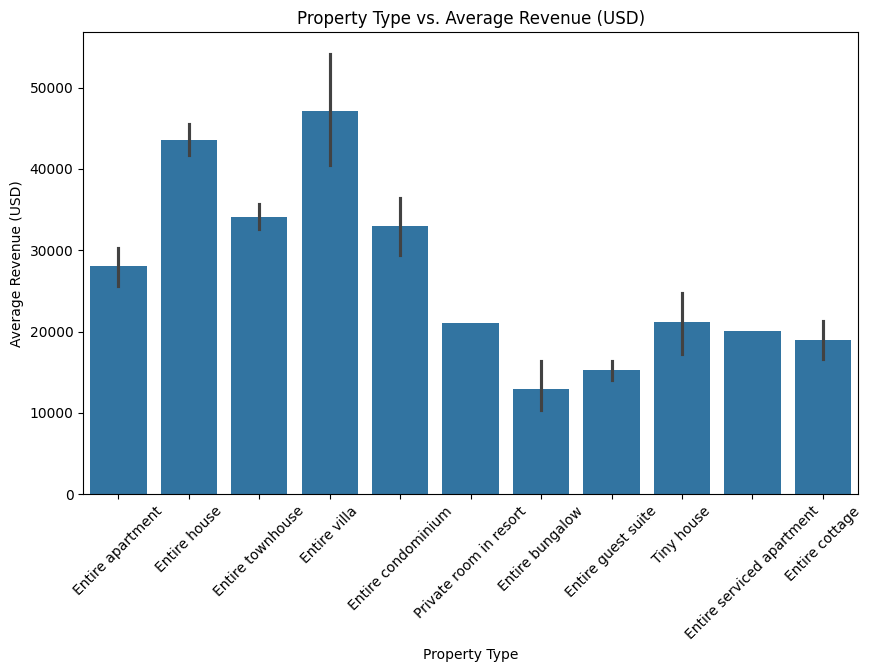

In [ ]:
# Plot the relationship between property type and average revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='avg_revenue', data=airbnb)
plt.title('Property Type vs. Average Revenue (USD)')
plt.xlabel('Property Type')
plt.ylabel('Average Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

## Plot Property vs. Average Occupancy Rate

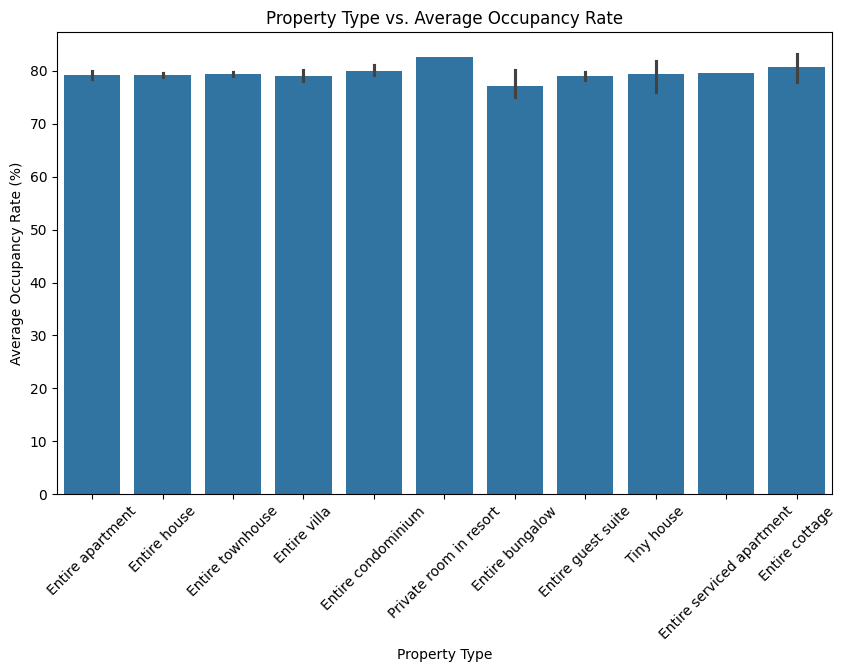

In [ ]:
# Plot the relationship between property type and average occupancy rate
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='avg_occupancy_rate', data=airbnb)
plt.title('Property Type vs. Average Occupancy Rate')
plt.xlabel('Property Type')
plt.ylabel('Average Occupancy Rate (%)')
plt.xticks(rotation=45)
plt.show()

## Plot the relationship between location and average revenue

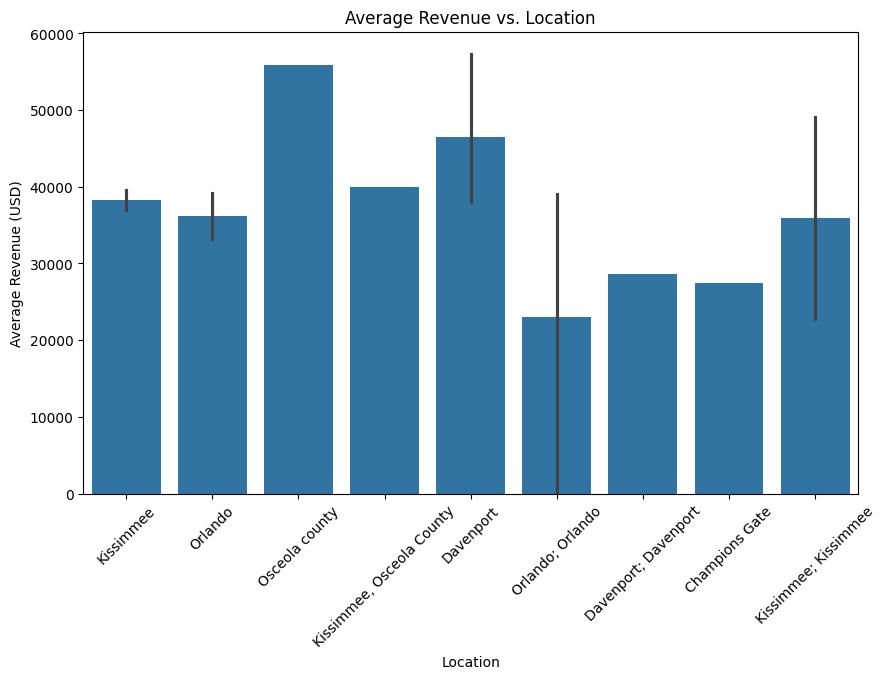

In [ ]:
# Plot the relationship between location and average revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='avg_revenue', data=airbnb)
plt.title('Average Revenue vs. Location')
plt.xlabel('Location')
plt.ylabel('Average Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

## Plot the relationship between location and average occupancy rate

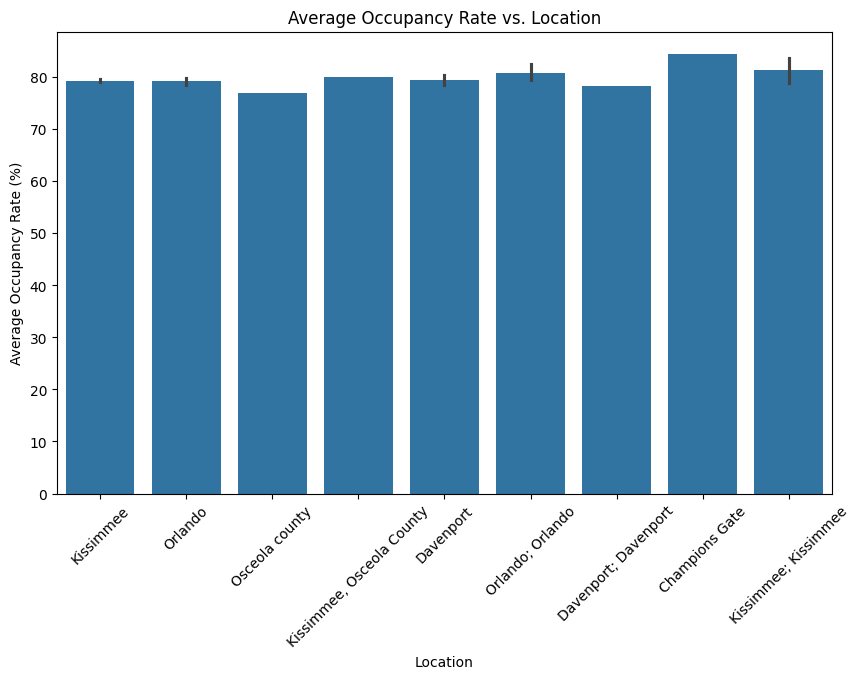

In [ ]:
# Plot the relationship between location and average occupancy rate
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='avg_occupancy_rate', data=airbnb)
plt.title('Average Occupancy Rate vs. Location')
plt.xlabel('Location')
plt.ylabel('Average Occupancy Rate (%)')
plt.xticks(rotation=45)
plt.show()

## Plot to 4 properties with higher occupancy rate

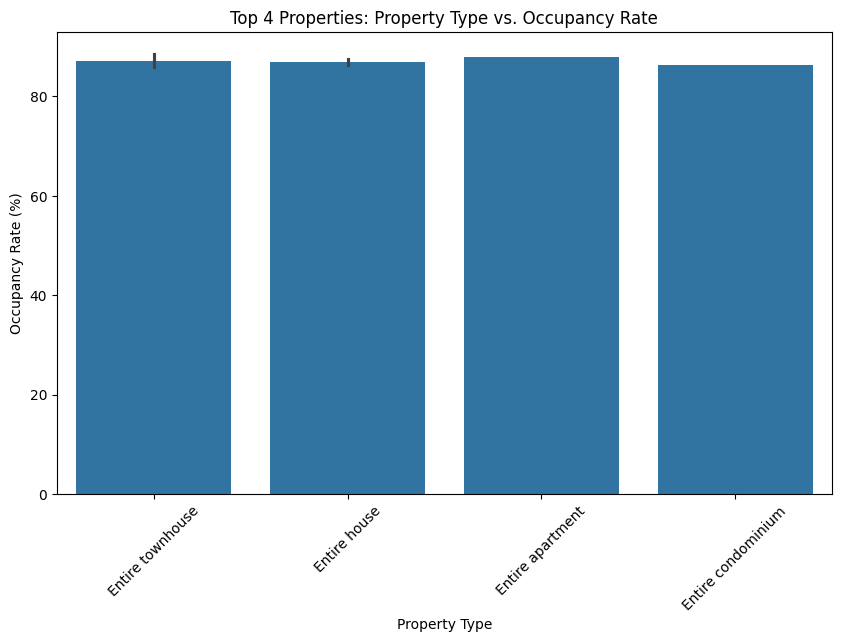

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='avg_occupancy_rate', data=top_10_occupancy)
plt.title('Top 4 Properties: Property Type vs. Occupancy Rate')
plt.xlabel('Property Type')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=45)
plt.show()

## Plot the revenue for each of the top 10 properties

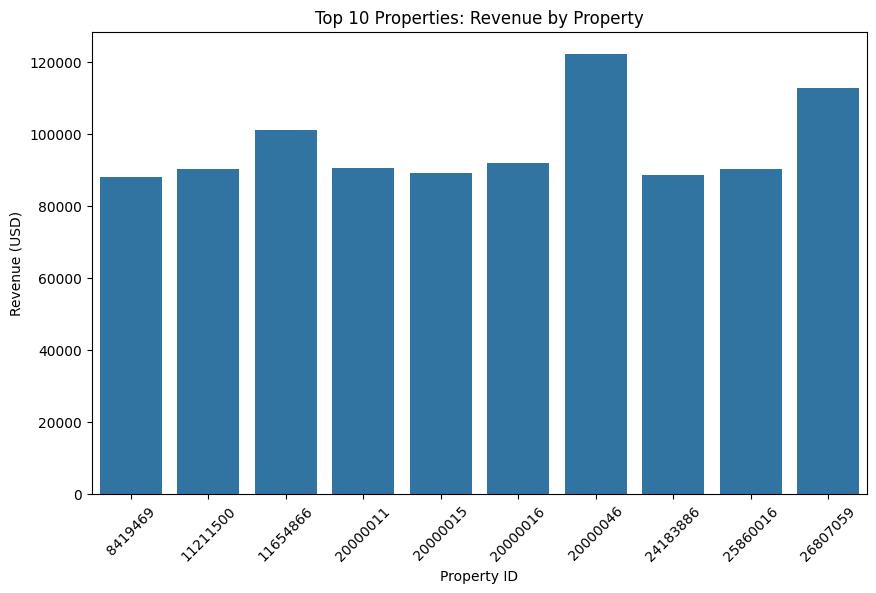

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='id', y='avg_revenue', data=top_10_revenue)
plt.title('Top 10 Properties: Revenue by Property')
plt.xlabel('Property ID')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

## Plot the relationship between property type and revenue for the top 2 properties

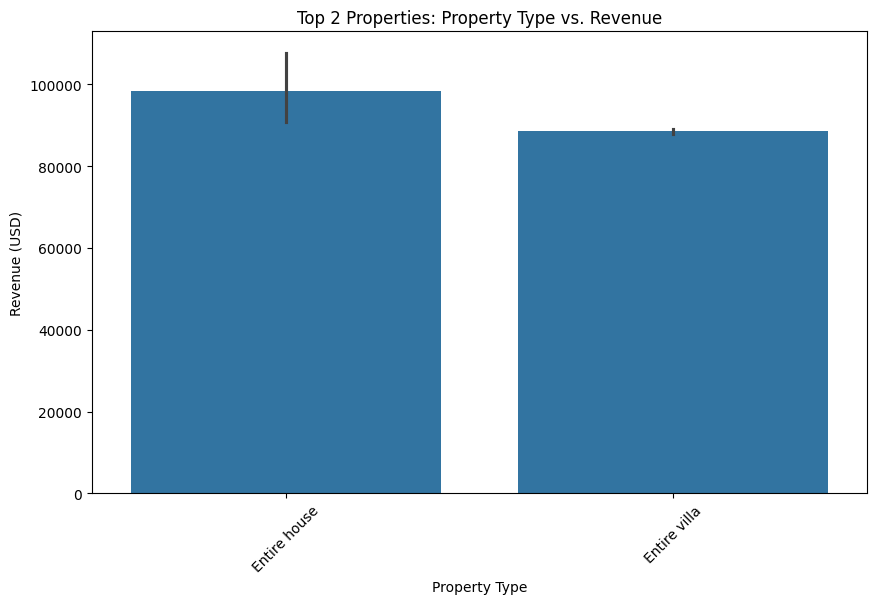

In [ ]:
# Plot the relationship between property type and revenue for the top 10 properties
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='avg_revenue', data=top_10_revenue)
plt.title('Top 2 Properties: Property Type vs. Revenue')
plt.xlabel('Property Type')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

## Plot the relationship between the number of bedrooms and average revenue

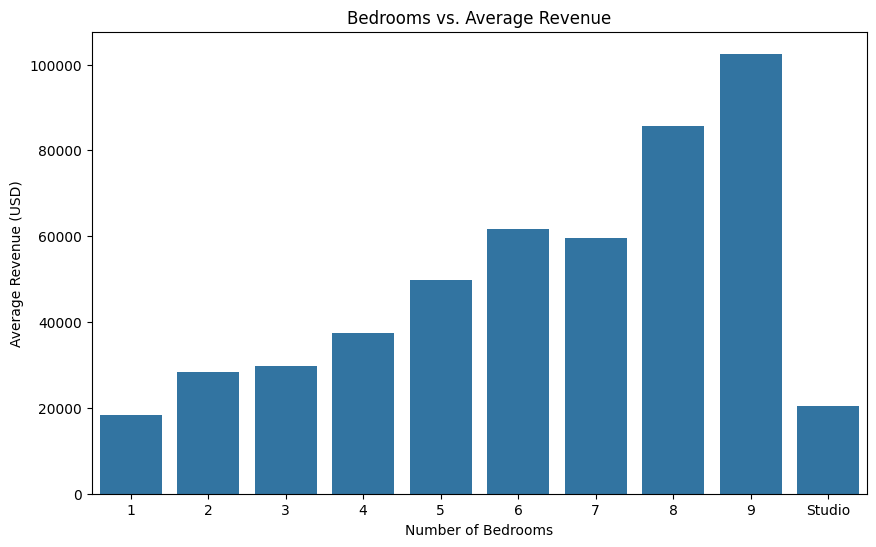

In [ ]:
# Plot the relationship between the number of bedrooms and average revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='avg_revenue', data=grouped_by_bedrooms)
plt.title('Bedrooms vs. Average Revenue')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Revenue (USD)')
plt.show()

# **Answers For the Analysis**


What is the best type of the house to invest?
---



Merge

In [ ]:
# First, we merge top_10_revenue with airbnb_listings for property details
top_10_with_details = pd.merge(
    top_10_revenue[['id', 'avg_revenue']],
    airbnb_listings[['id', 'property_name', 'location', 'type', 'bedrooms']],
    on='id',
    how='left'
)

# Then, we merge with 'airbnb' to get the 'avg_occupancy_rate' column
top_10_detailed_table = pd.merge(
    top_10_with_details,
    airbnb[['id', 'avg_occupancy_rate']],
    on='id',
    how='left'
)

# Display the table with id, property_name, avg_revenue, location, type, bedrooms, and avg_occupancy_rate
top_10_detailed_table = top_10_detailed_table[['id', 'property_name' , 'location', 'type', 'bedrooms', 'avg_occupancy_rate', 'avg_revenue']]

Top 10 detailed table

In [ ]:
# Show the updated table
top_10_detailed_table




,id,property_name,location,type,bedrooms,avg_occupancy_rate,avg_revenue
0,20000046,MyRental Property 03,Davenport,Entire house,9,75.6,122179.92
1,26807059,7BD/6BA Fantastic Home w/pool at Storey Lake #61,Kissimmee,Entire house,7,77.5,112605.78
2,11654866,"Luxury 7BD villa, perfect location.",Kissimmee,Entire house,7,79.2,100926.00
3,20000016,MyRental Property 33,Kissimmee,Entire house,6,78.9,91817.77
4,20000011,MyRental Property 37,Kissimmee,Entire house,5,82.8,90420.59
5,25860016,1860 - Modern Home 6 Ensuites Close to Disney,Kissimmee,Entire house,6,86.1,90155.31
6,11211500,New 8 Bed/6 Bath Luxury Villa,Kissimmee,Entire house,8,82.7,90145.51
7,20000015,MyRental Property 34,Kissimmee,Entire villa,6,79.2,89161.95
8,24183886,SPECIAL OFFER Storey Lake 6BD&6BA 2963,Kissimmee,Entire house,6,81.2,88501.01
9,8419469,Beautiful 6 bedroom Home- reunion,Kissimmee,Entire villa,6,80.6,87938.89


The recommended type of property to invest is the "entire house", located in kissimmee with 5 or 6 bedrooms.

## What is the ROI (paying 20% of an agent comission comparing without an agent)?

### Merge

In [ ]:
# Convert 'bedrooms' in both tables to integers
top_10_detailed_table['bedrooms'] = top_10_detailed_table['bedrooms'].astype(int)
investment_option['Bedrooms'] = investment_option['Bedrooms'].astype(int)

# Now merge the top 10 detailed properties with their investment costs based on the number of bedrooms
top_10_with_investment = pd.merge(
    top_10_detailed_table,
    investment_option[['Bedrooms', 'Total cost']],
    left_on='bedrooms',
    right_on='Bedrooms',
    how='left'
)

### Calculate ROI without agent commission

In [ ]:
# Calculate ROI without agent commission
top_10_with_investment['ROI_without_agent'] = top_10_with_investment['avg_revenue'] / top_10_with_investment['Total cost']

### Calculate ROI with 20% agent commission

In [ ]:
# Calculate ROI with 20% agent commission
top_10_with_investment['ROI_with_agent'] = (top_10_with_investment['avg_revenue'] * 0.8) / top_10_with_investment['Total cost']

### Visualizatoin

Convert ROI to percentage

In [ ]:
# Convert ROI to percentage
top_10_with_investment['ROI_without_agent_percentage'] = top_10_with_investment['ROI_without_agent'] * 100
top_10_with_investment['ROI_with_agent_percentage'] = top_10_with_investment['ROI_with_agent'] * 100

Plot ROI without agent commission

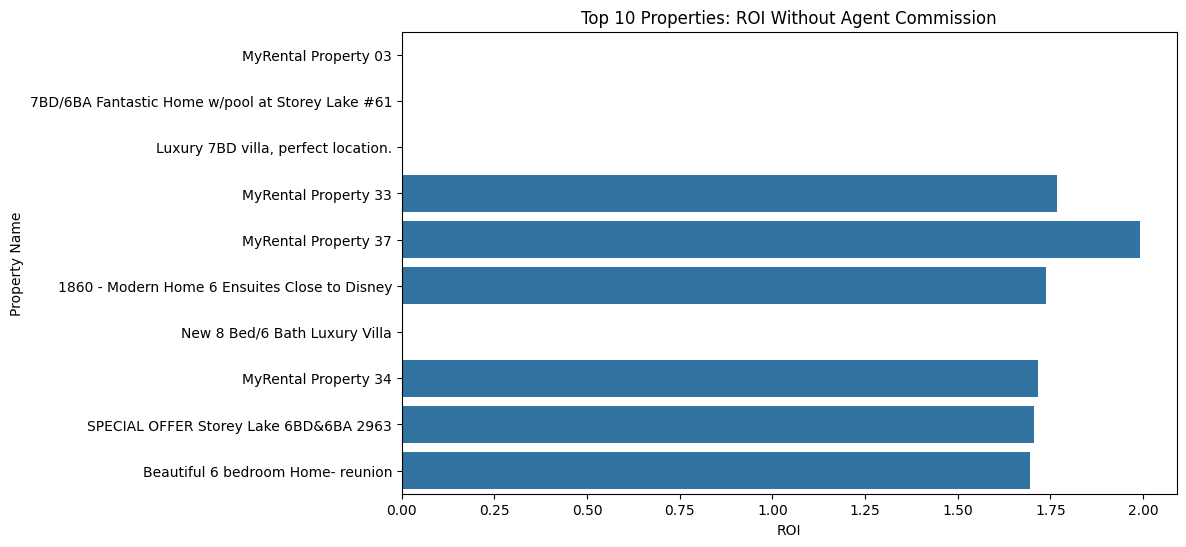

In [ ]:
# Revised plot to show ROI without agent commission with property names on y-axis
plt.figure(figsize=(10, 6))
sns.barplot(x='ROI_without_agent', y='property_name', data=top_10_with_investment)
plt.title('Top 10 Properties: ROI Without Agent Commission')
plt.xlabel('ROI')
plt.ylabel('Property Name')
plt.show()

Plot ROI with agent commission

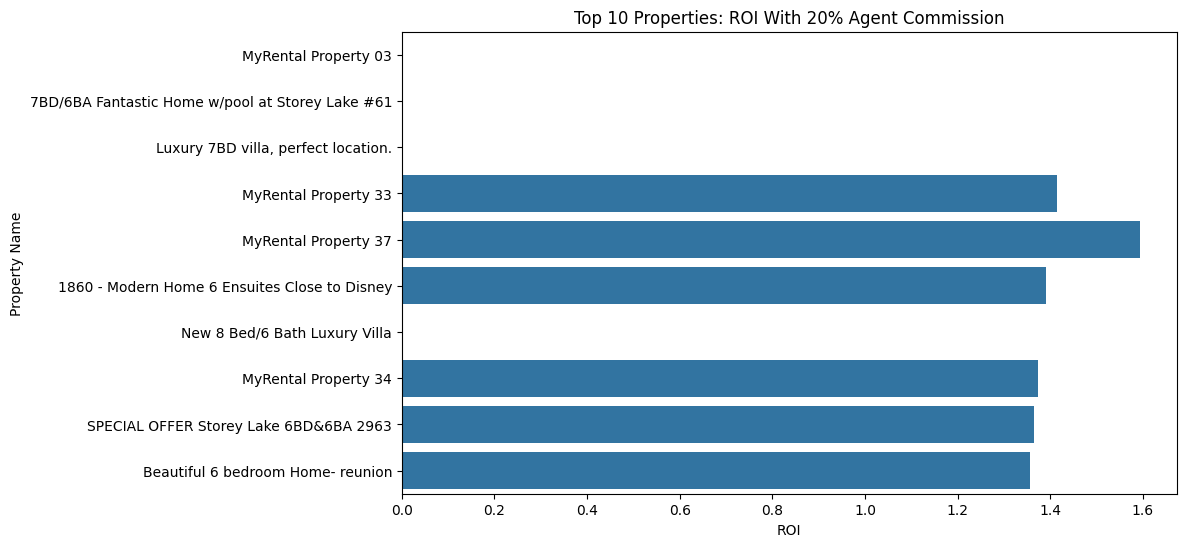

In [ ]:
# Plot ROI with agent commission
plt.figure(figsize=(10, 6))
sns.barplot(x='ROI_with_agent', y='property_name', data=top_10_with_investment)
plt.title('Top 10 Properties: ROI With 20% Agent Commission')
plt.xlabel('ROI')
plt.ylabel('Property Name')
plt.show()

## What would happen if the rent drops 20% in the average?

In [ ]:
# Simulate a 20% drop in revenue
top_10_with_investment['revenue_after_rent_drop'] = top_10_with_investment['avg_revenue'] * 0.8

# Calculate ROI without agent commission after the 20% rent drop
top_10_with_investment['ROI_without_agent_rent_drop'] = top_10_with_investment['revenue_after_rent_drop'] / top_10_with_investment['Total cost']

# Calculate ROI with 20% agent commission after the 20% rent drop
top_10_with_investment['ROI_with_agent_rent_drop'] = (top_10_with_investment['revenue_after_rent_drop'] * 0.8) / top_10_with_investment['Total cost']





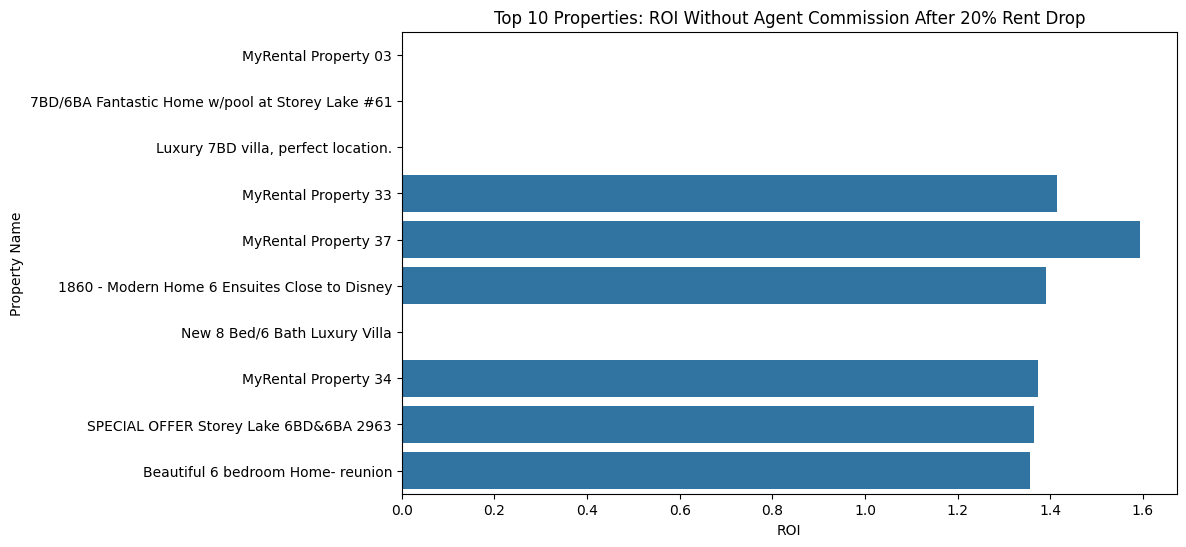

In [ ]:
# Plot ROI without agent commission after rent drop
plt.figure(figsize=(10, 6))
sns.barplot(x='ROI_without_agent_rent_drop', y='property_name', data=top_10_with_investment)
plt.title('Top 10 Properties: ROI Without Agent Commission After 20% Rent Drop')
plt.xlabel('ROI')
plt.ylabel('Property Name')
plt.show()

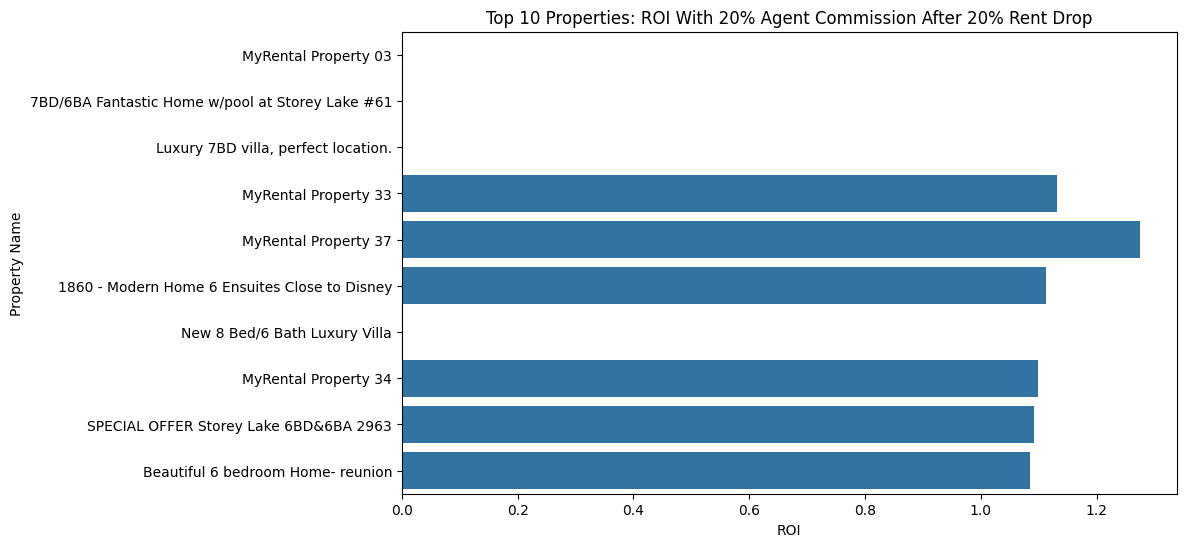

In [ ]:
# Plot ROI with agent commission after rent drop
plt.figure(figsize=(10, 6))
sns.barplot(x='ROI_with_agent_rent_drop', y='property_name', data=top_10_with_investment)
plt.title('Top 10 Properties: ROI With 20% Agent Commission After 20% Rent Drop')
plt.xlabel('ROI')
plt.ylabel('Property Name')
plt.show()